### **AI CareerScope**

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [5]:
df = pd.read_csv("ai_job_market_insights.csv")

In [7]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [9]:
# To view all the columns name 
df.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [11]:
# To view all the columns name 
df.shape

(500, 10)

In [13]:
# To get a concise summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [184]:
# To get statistical summary of numerical columns 
df.describe()

,Salary_USD
count,495.000000
mean,91325.220905
std,19741.821674
min,41298.726205
25%,78866.135451
50%,92027.134231
75%,103954.002717
max,140475.995812


In [19]:
# To check for missing values in each column.
df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [23]:
#checking duplicates record
df.duplicated().sum()


0

In [25]:
len(df.Job_Title.unique())

10

In [31]:
df[df['Job_Title'].duplicated(keep = False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [41]:
Q1 = df['Salary_USD'].quantile(0.25)
Q3 = df['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df[(df['Salary_USD'] >= (Q1 - 1.5 * IQR)) & (df['Salary_USD'] <= (Q3 + 1.5* IQR))]
df = filtered_data

### **Univariate Analysis**

In [46]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           60
HR Manager               57
Cybersecurity Analyst    54
UX Designer              53
AI Researcher            51
Sales Manager            49
Marketing Specialist     47
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\493113892.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=value_counts,


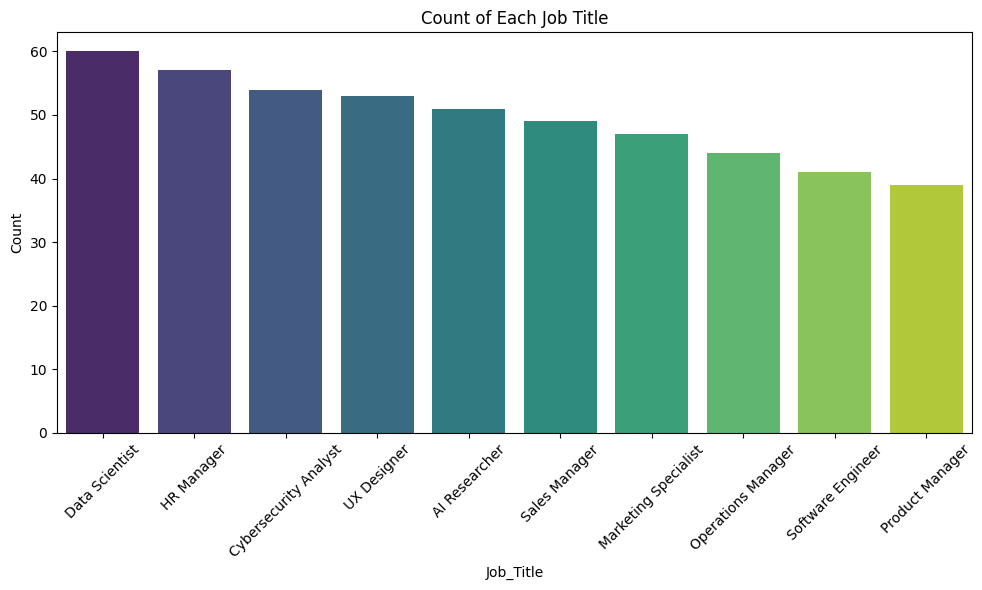

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare Data
value_counts = df['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title','Count']

# Create the plot
plt.figure(figsize=(10,6))
sns.barplot(data=value_counts,        
            x='Job_Title',
            y='Count',
            palette='viridis'  # Correct palette name
)

# Customize
plt.title('Count of Each Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
value_counts = df.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Technology            56
Finance               52
Telecommunications    52
Energy                49
Entertainment         46
Retail                46
Healthcare            41
Transportation        38
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1840967964.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


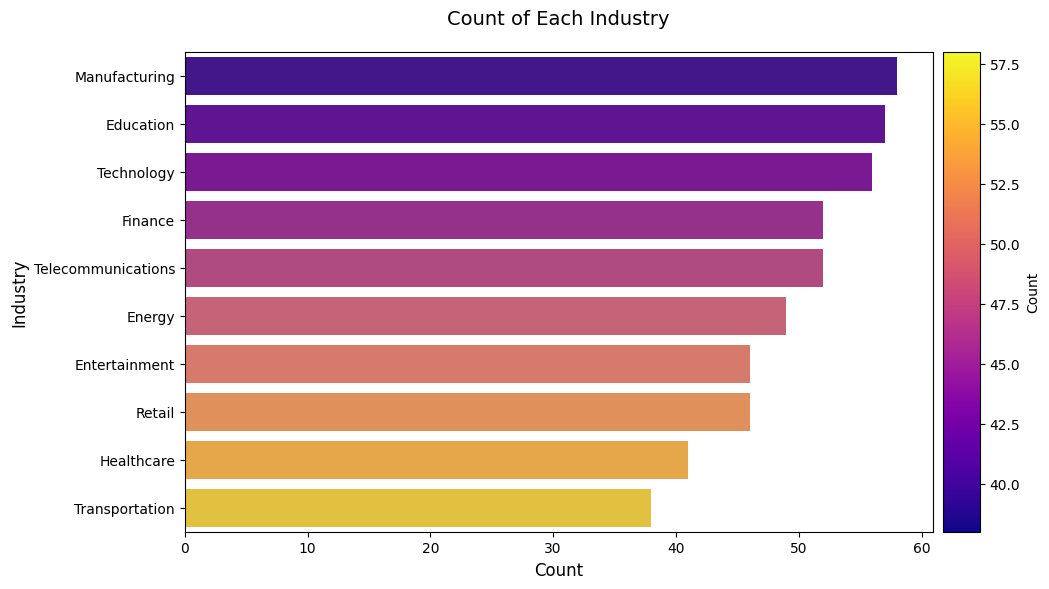

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

# 1. Prepare the data
value_counts = df['Industry'].value_counts().reset_index()
value_counts.columns = ['Industry', 'Count']

# 2. Create the plot with corrected parameters
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=value_counts,
    y='Industry',
    x='Count',
    palette='plasma',
    dodge=False
)

# 3. Safely remove legend if it exists
if ax.legend_ is not None:
    ax.legend_.remove()

# 4. Customize the plot
plt.title('Count of Each Industry', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()

# 5. Add colorbar safely
norm = plt.Normalize(vmin=value_counts['Count'].min(), vmax=value_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

# Create dedicated colorbar axis
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(sm, cax=cax, label='Count')

plt.show()


In [84]:
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,169
1,Large,165
2,Medium,161


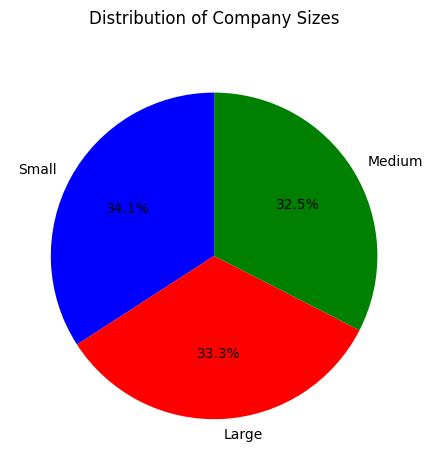

In [90]:
# Prepare data
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts.columns = ['Company_Size','Count']

# Custom colors (matching your Plotly version)
custom_colors = {'Small': 'blue', 'Medium': 'green', 'Large': 'red'}

# Create pie plt.figure(figsize=(8, 8))
plt.pie(
    value_counts['Count'],
    labels=value_counts['Company_Size'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate starting position
    colors=[custom_colors[size] for size in value_counts['Company_Size']]  # Apply custom colors
  )


# Add title and style
plt.title('Distribution of Company Sizes', pad=20)
plt.tight_layout()
plt.show()

In [92]:
df.Location.value_counts()

Location
San Francisco    61
Singapore        53
Sydney           52
Dubai            51
Tokyo            51
New York         48
Berlin           47
London           46
Paris            45
Toronto          41
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\2904131481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


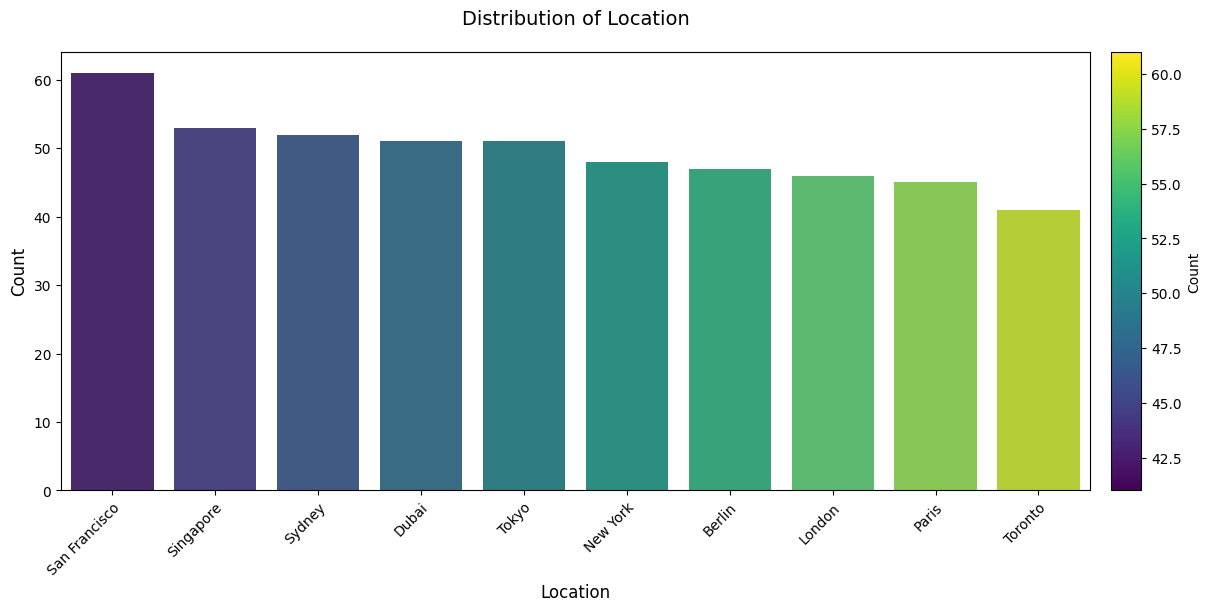

In [104]:
#Prepare data - more consice version 
value_counts = df['Location'].value_counts().reset_index(name = 'Count')

# Create figure with constrained layout for better spacing
plt.figure(figsize=(12,6),constrained_layout=True)

# Create bar plot - removed hue parameter which can cause issues
ax = sns.barplot(
      data = value_counts,
      x = 'Location',
      y = 'Count',
      palette = 'viridis',
      dodge = False,
      saturation = 0.8
)

#Customize plot
ax.set_title('Distribution of Location' , fontsize = 14 ,pad = 20)
ax.set_xlabel('Location', fontsize = 12)
ax.set_ylabel('Count',fontsize = 12)

# Rotate x-labels and align properly
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


# Add colorbar
norm = Normalize(vmin = value_counts['Count'].min(),vmax = value_counts['Count'].max())
sm = ScalarMappable(cmap = 'viridis', norm = norm)
sm.set_array([])


# Create colorbar in its own axis to prevent shrinking main plot
cax = ax.inset_axes([1.02, 0, 0.03, 1])  # [x, y, width, height] in axes coordinates
plt.colorbar(sm , cax = cax ,label= 'Count')
plt.show()                                                         

In [112]:
value_counts = df['AI_Adoption_Level'].value_counts()
value_counts

AI_Adoption_Level
Medium    178
Low       172
High      145
Name: count, dtype: int64

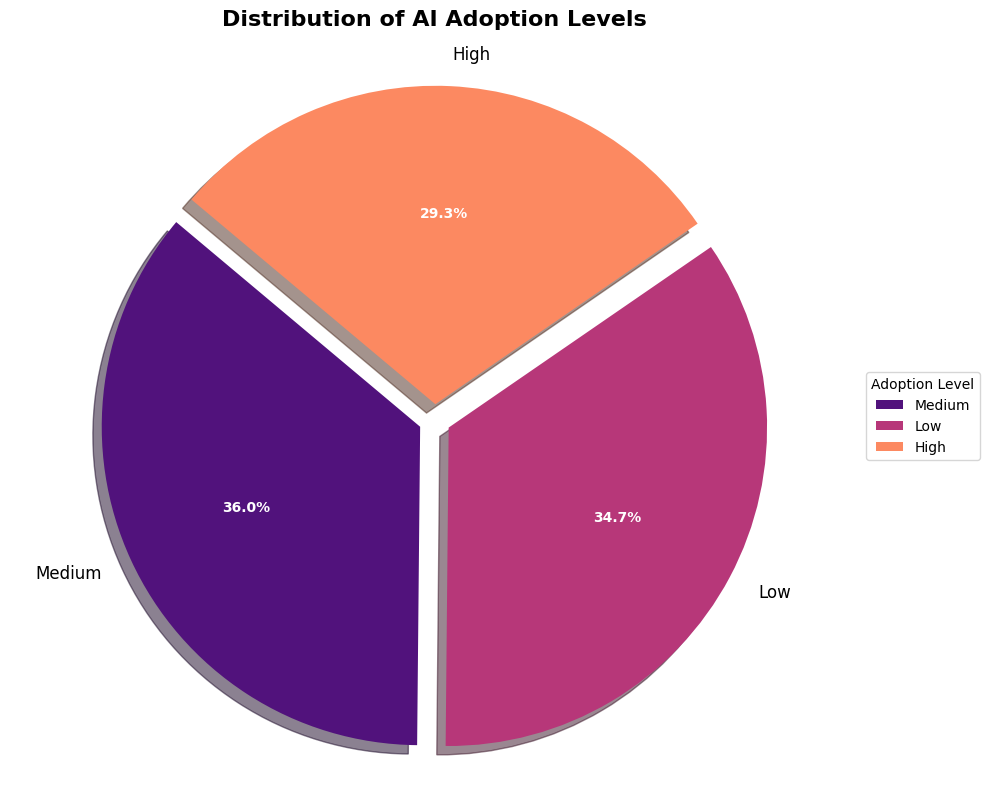

In [120]:
# Prepare the data
value_counts = df['AI_Adoption_Level'].value_counts()

# Create a more visually appealing pie chart
plt.figure(figsize=(10,8))
colors = sns.color_palette('magma',len(value_counts))

# Custom explode for better visual separation (optional)
explode = [0.05] * len(value_counts)

wedges, texts , autotexts = plt.pie(
    value_counts,
    labels= value_counts.index,
    autopct = '%1.1f%%',
    colors = colors,
    startangle = 140,
    explode = explode,
    shadow = True,
    textprops = {'fontsize': 12}
)

# Improve percentage text formatting
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Add title with better formatting
plt.title(
    'Distribution of AI Adoption Levels',
    fontsize = 16,
    fontweight = 'bold',
    pad = 20
)

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')

# Add legend for better readability (optional)
plt.legend(
    wedges,
    value_counts.index,
    title = "Adoption Level",
    loc = 'center left',
    bbox_to_anchor=(1,0,0.5,1)
)
plt.tight_layout()
plt.show()

In [130]:
df.Automation_Risk.value_counts()

Automation_Risk
Medium    171
High      168
Low       156
Name: count, dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1972084275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


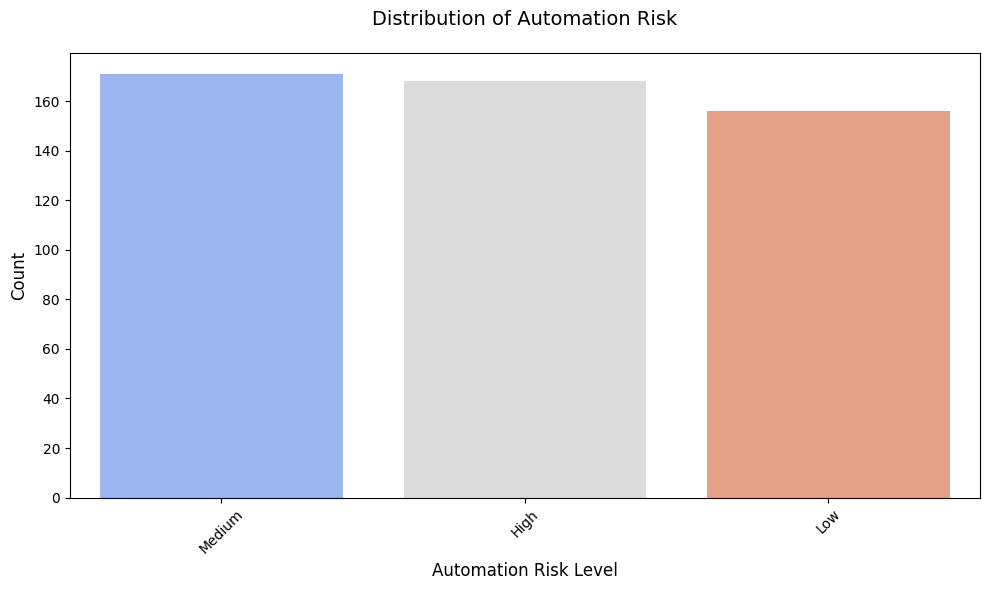

In [186]:
value_counts = df['Automation_Risk'].value_counts().reset_index()
value_counts.columns = ['Automation_Risk', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(
    data=value_counts,
    x='Automation_Risk',
    y='Count',
    palette='coolwarm'
)
plt.title('Distribution of Automation Risk', fontsize=14, pad=20)
plt.xlabel('Automation Risk Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [142]:
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Cybersecurity,58
2,Python,58
3,Machine Learning,52
4,UX/UI Design,48
5,Sales,48
6,Data Analysis,48
7,Marketing,45
8,JavaScript,44
9,Communication,34


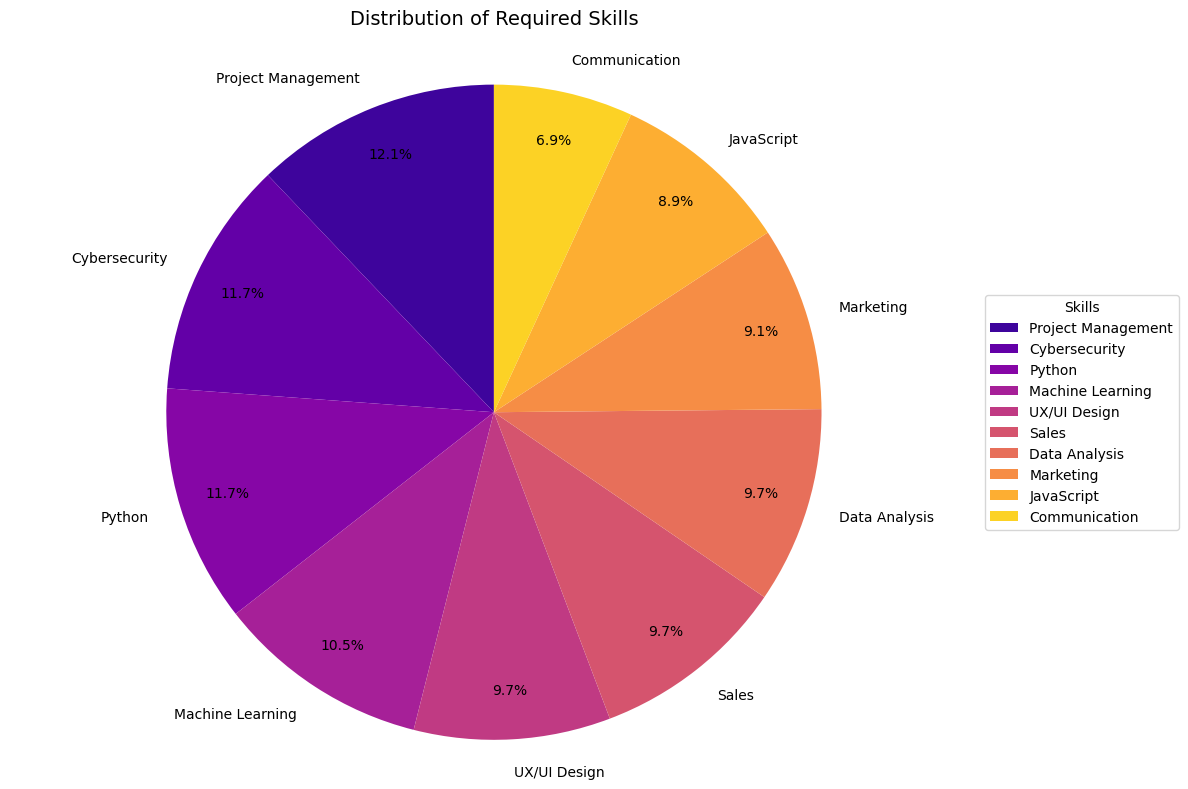

In [146]:
# Prepare data
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts.columns = ['Required_Skills', 'Count']

# Create figure
plt.figure(figsize=(10, 8))

# Create pie chart with Plasma color scheme
colors = sns.color_palette("plasma", len(value_counts))
wedges, texts, autotexts = plt.pie(
    value_counts['Count'],
    labels=value_counts['Required_Skills'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,  # Adjust percentage position
    textprops={'fontsize': 10}
)

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Add title and adjust layout
plt.title('Distribution of Required Skills', pad=20, fontsize=14, loc='center')
plt.tight_layout()

# Optional: 
# Optional: Add legend for better readability
plt.legend(
    wedges,
    value_counts['Required_Skills'],
    title="Skills",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

In [150]:
df.describe()

,Salary_USD
count,495.000000
mean,91325.220905
std,19741.821674
min,41298.726205
25%,78866.135451
50%,92027.134231
75%,103954.002717
max,140475.995812


In [156]:
df["Salary_USD"].value_counts()

Salary_USD
111392.165243    1
104854.999236    1
97811.878124     1
90737.496084     1
74057.145512     1
                ..
98153.125072     1
98036.517081     1
88155.315907     1
87565.920912     1
68764.378921     1
Name: count, Length: 495, dtype: int64

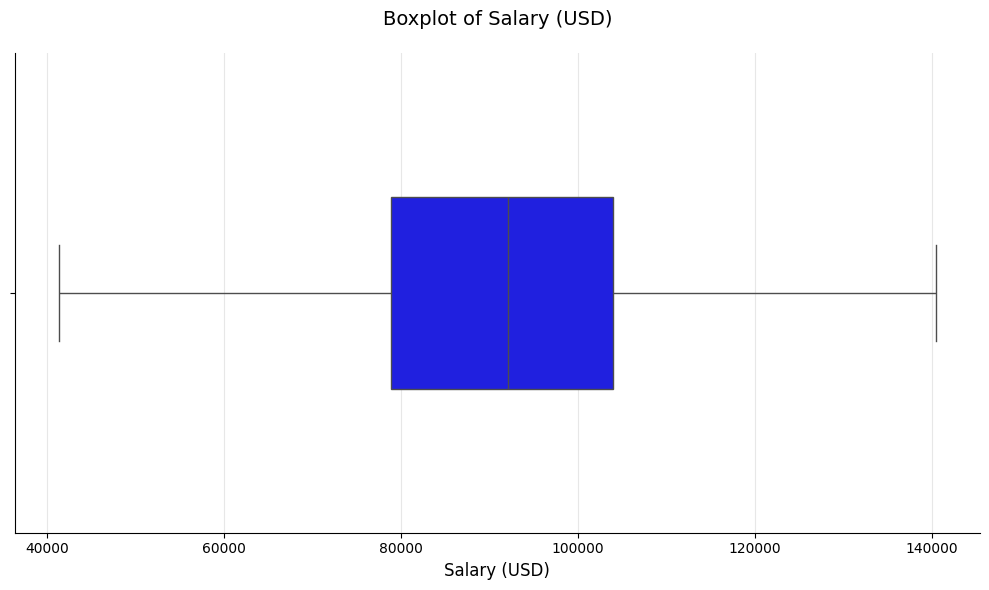

In [160]:
plt.figure(figsize=(10,6))

# Create boxplot with blue color
sns.boxplot(
    x= df['Salary_USD'],
    color = 'blue',
    width = 0.4
)
# Add titles and labels
plt.title('Boxplot of Salary (USD)', fontsize=14, pad=20)
plt.xlabel('Salary (USD)', fontsize=12)
plt.grid(axis='x', alpha=0.3)  # Add light grid lines

# Remove top/right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

<Axes: xlabel='Salary_USD', ylabel='Density'>

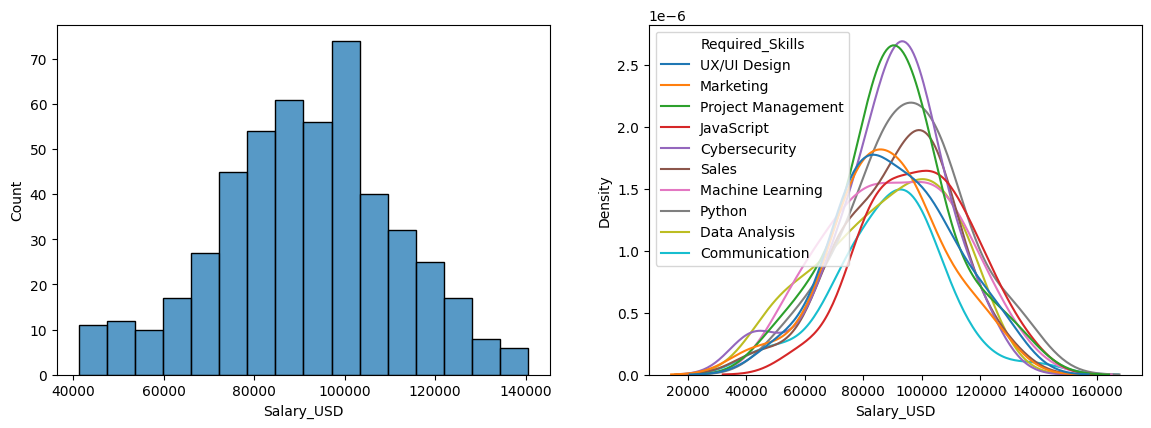

In [164]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Salary_USD',data = df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Salary_USD', hue='Required_Skills', data = df)

In [168]:
df["Remote_Friendly"].value_counts()

Remote_Friendly
Yes    248
No     247
Name: count, dtype: int64

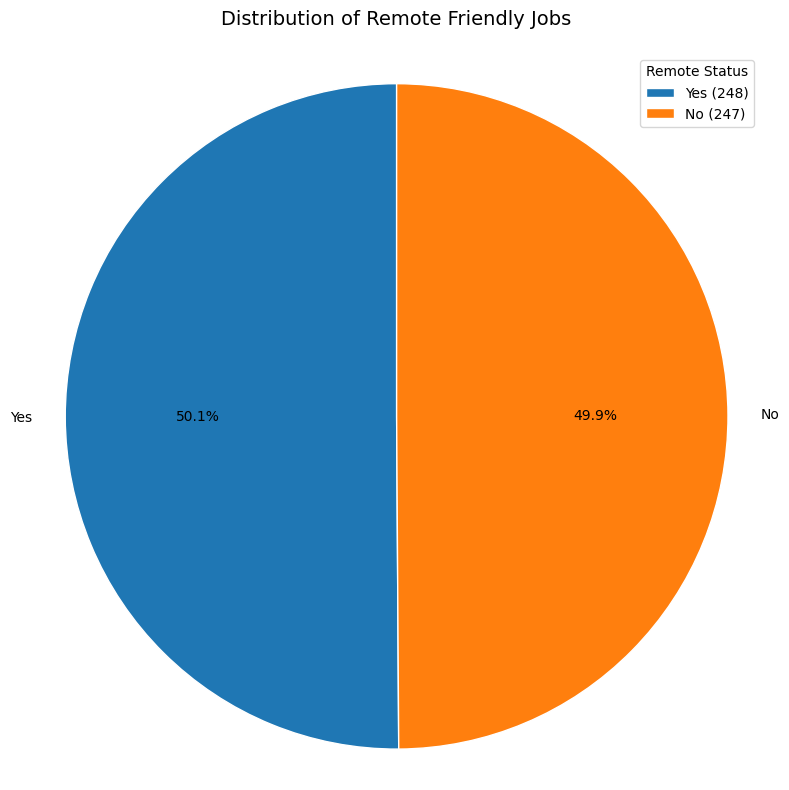

In [226]:
# Prepare data
value_counts = df['Remote_Friendly'].value_counts().reset_index()
value_counts.columns = ['Remote_Friendly', 'Count']

# Create figure
plt.figure(figsize=(8, 8))

# Create pie chart with automatic coloring
plt.pie(
    value_counts['Count'],
    labels=value_counts['Remote_Friendly'].astype(str),  # Ensure labels are strings
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e'],  # Blue and orange default colors
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Clean edges
)

# Add title
plt.title('Distribution of Remote Friendly Jobs', pad=20, fontsize=14)

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Optional legend (useful for binary categories)
plt.legend(
    title="Remote Status",
    loc="upper right",
    labels=[f"{cat} ({count})" for cat, count in zip(value_counts['Remote_Friendly'], value_counts['Count'])]
)

plt.tight_layout()
plt.show()

In [176]:
df.Job_Growth_Projection.value_counts()

Job_Growth_Projection
Growth     168
Decline    167
Stable     160
Name: count, dtype: int64

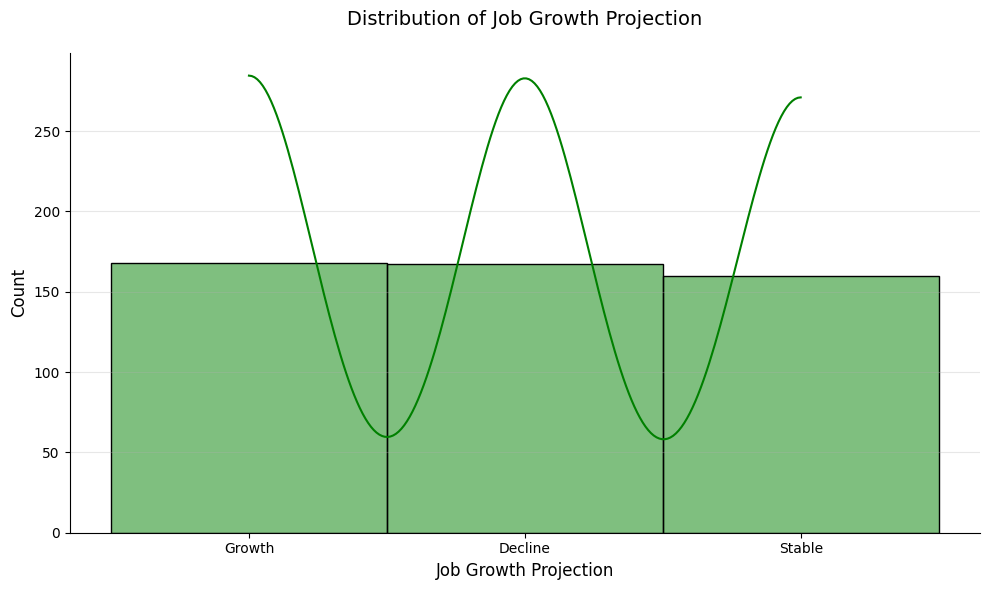

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Job_Growth_Projection'], kde=True, color='green', bins=20)
plt.title('Distribution of Job Growth Projection', fontsize=14, pad=20)
plt.xlabel('Job Growth Projection', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3) 
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\114870729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Industry', y='Salary_USD', palette='Set3')


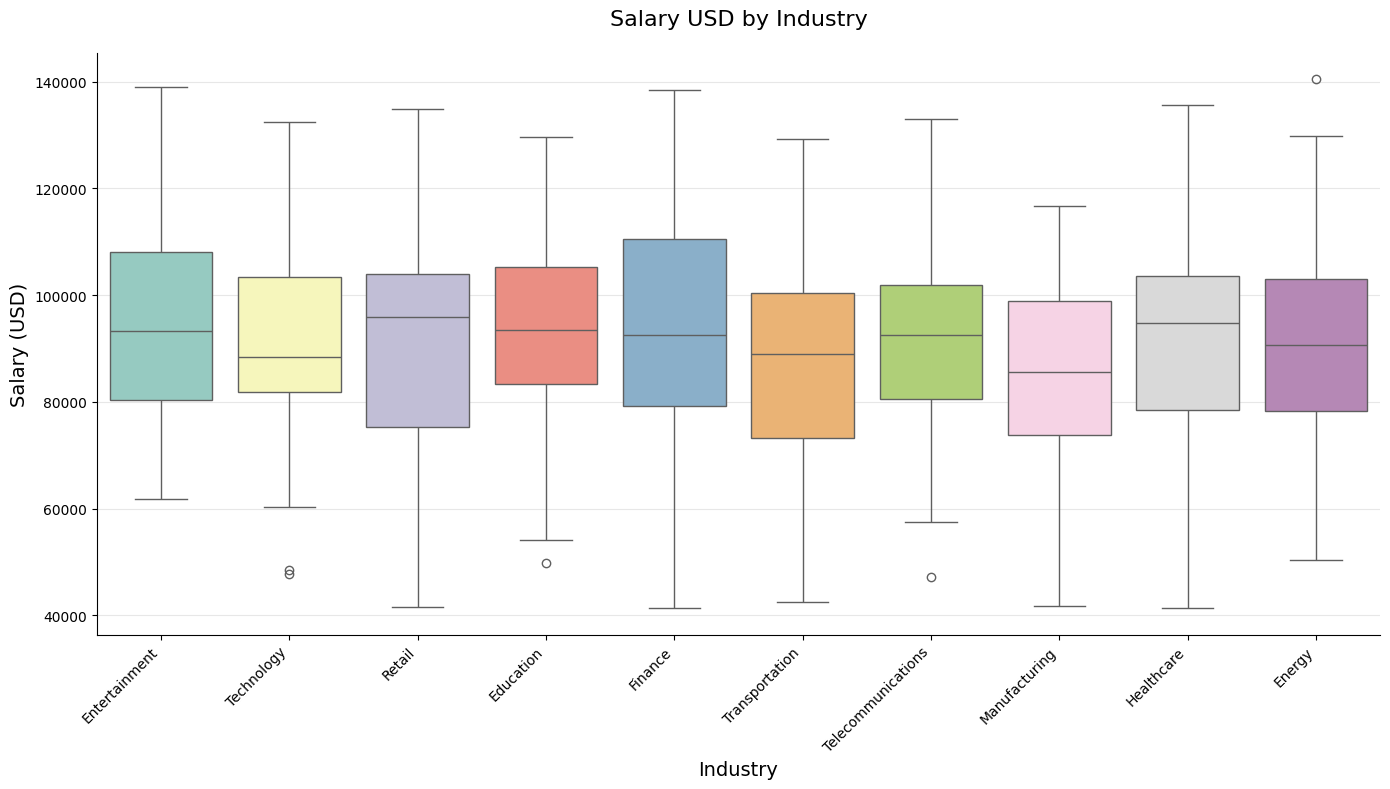

In [194]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Industry', y='Salary_USD', palette='Set3')
plt.title('Salary USD by Industry', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\461701899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Company_Size', y='Salary_USD', palette='coolwarm')


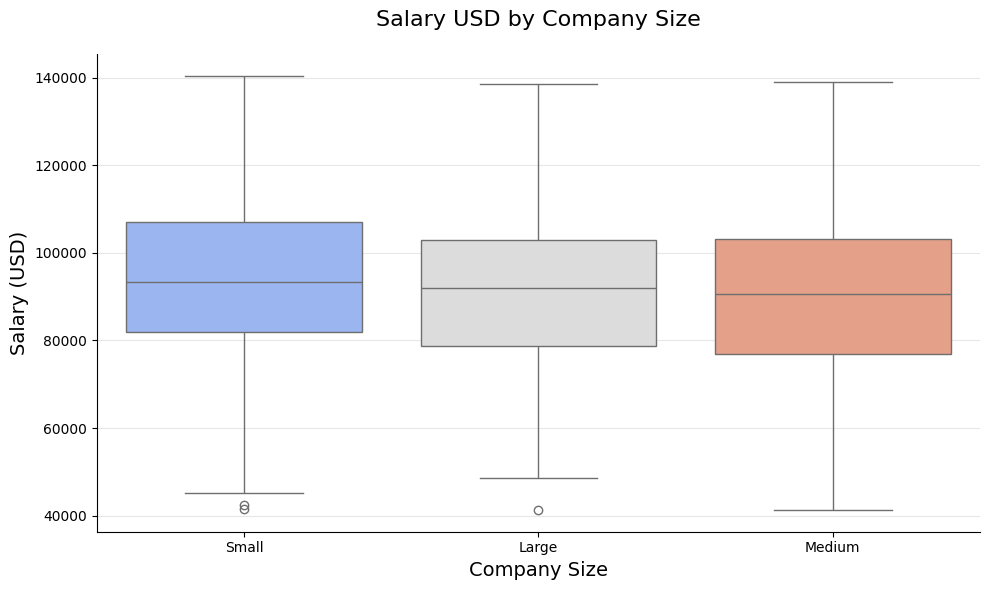

In [198]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Company_Size', y='Salary_USD', palette='coolwarm')
plt.title('Salary USD by Company Size', fontsize=16, pad=20)
plt.xlabel('Company Size', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

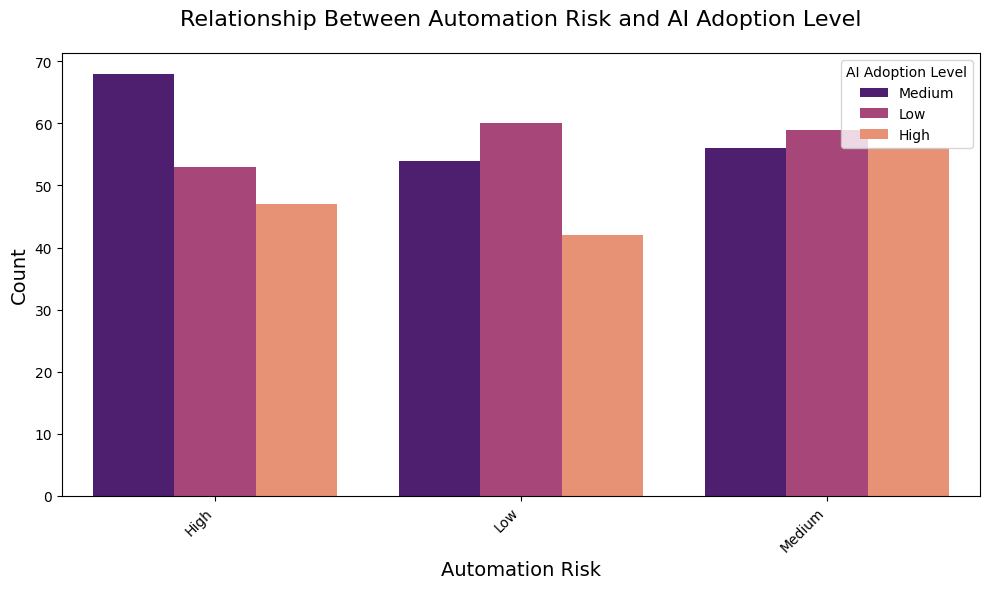

In [202]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Automation_Risk', hue='AI_Adoption_Level', palette='magma')
plt.title('Relationship Between Automation Risk and AI Adoption Level', fontsize=16, pad=20)
plt.xlabel('Automation Risk', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='AI Adoption Level', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Automation_Risk_vs_AI_Adoption_Level.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1483068080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


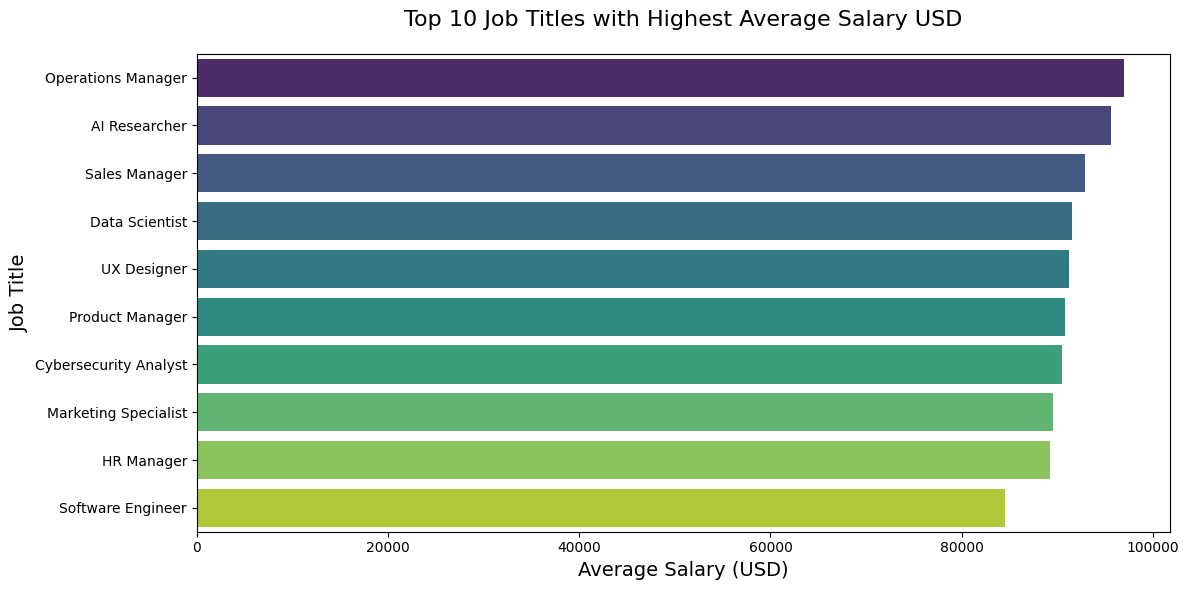

In [206]:
plt.figure(figsize=(12, 6))
top_job_titles = df.groupby('Job_Title')['Salary_USD'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')
plt.title('Top 10 Job Titles with Highest Average Salary USD', fontsize=16, pad=20)
plt.xlabel('Average Salary (USD)', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1749820099.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Remote_Friendly', y='Salary_USD', palette='coolwarm')


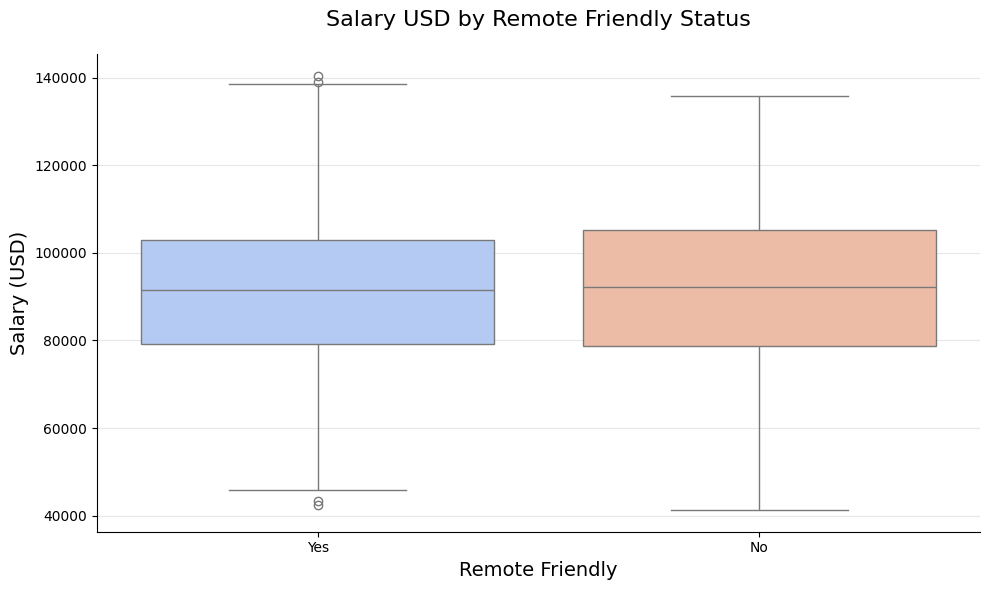

In [210]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Remote_Friendly', y='Salary_USD', palette='coolwarm')
plt.title('Salary USD by Remote Friendly Status', fontsize=16, pad=20)
plt.xlabel('Remote Friendly', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

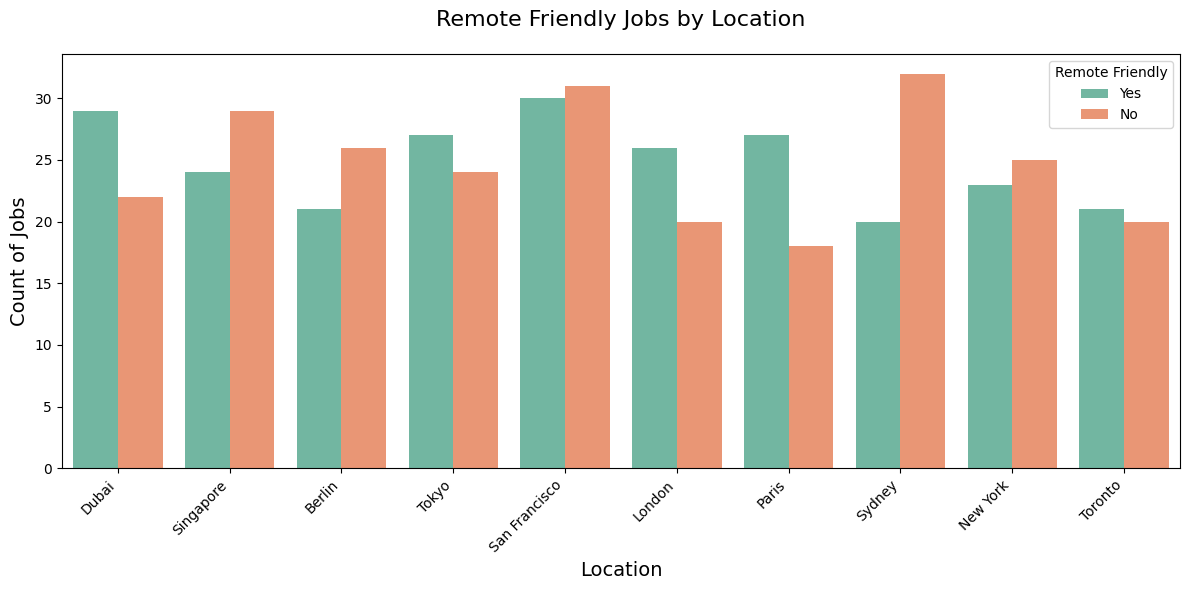

In [214]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', hue='Remote_Friendly', palette='Set2')
plt.title('Remote Friendly Jobs by Location', fontsize=16, pad=20)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count of Jobs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Friendly', loc='upper right')
plt.tight_layout()
plt.show()

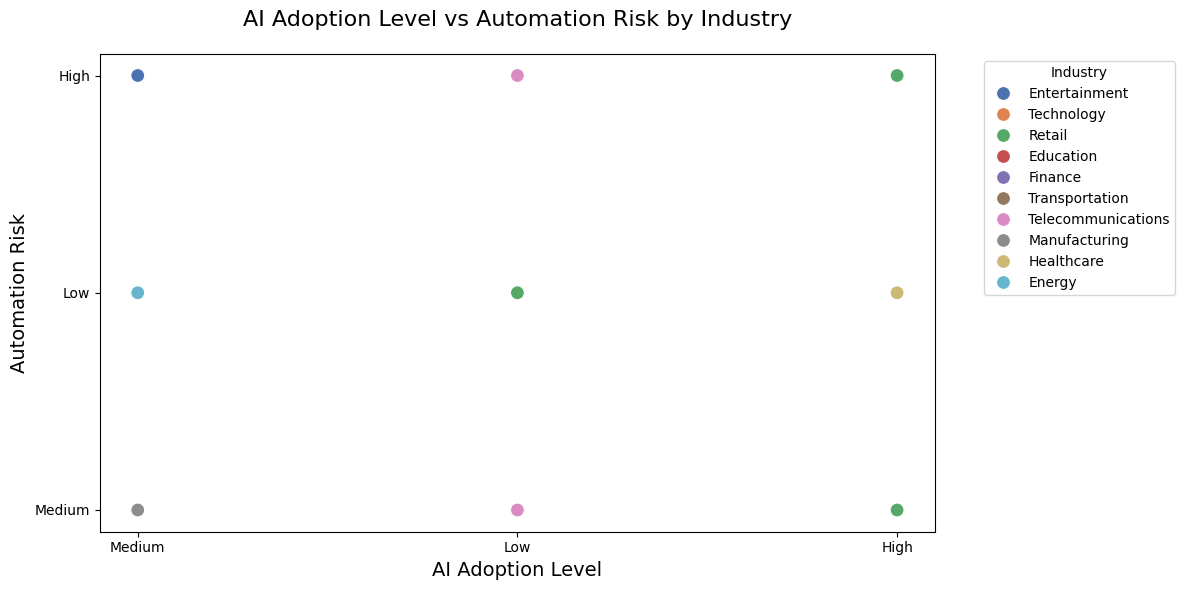

In [218]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='AI_Adoption_Level', y='Automation_Risk', hue='Industry', palette='deep', s=100)
plt.title('AI Adoption Level vs Automation Risk by Industry', fontsize=16, pad=20)
plt.xlabel('AI Adoption Level', fontsize=14)
plt.ylabel('Automation Risk', fontsize=14)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1257296452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Industry', y='Job_Growth_Projection', palette='Set2')


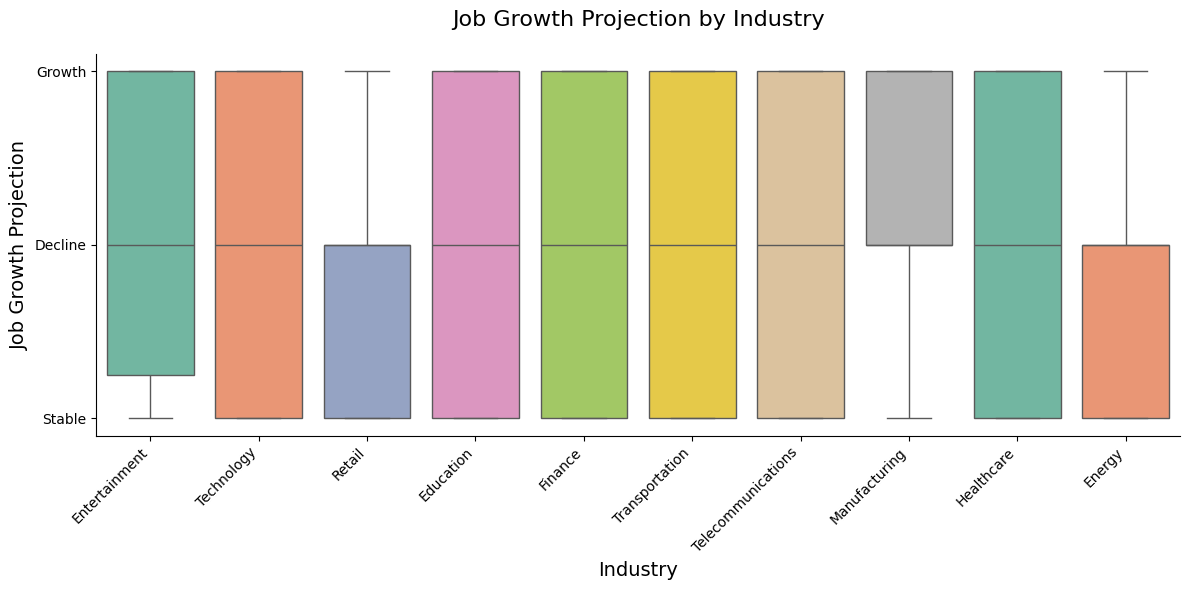

In [222]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Industry', y='Job_Growth_Projection', palette='Set2')
plt.title('Job Growth Projection by Industry', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Job Growth Projection', fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()

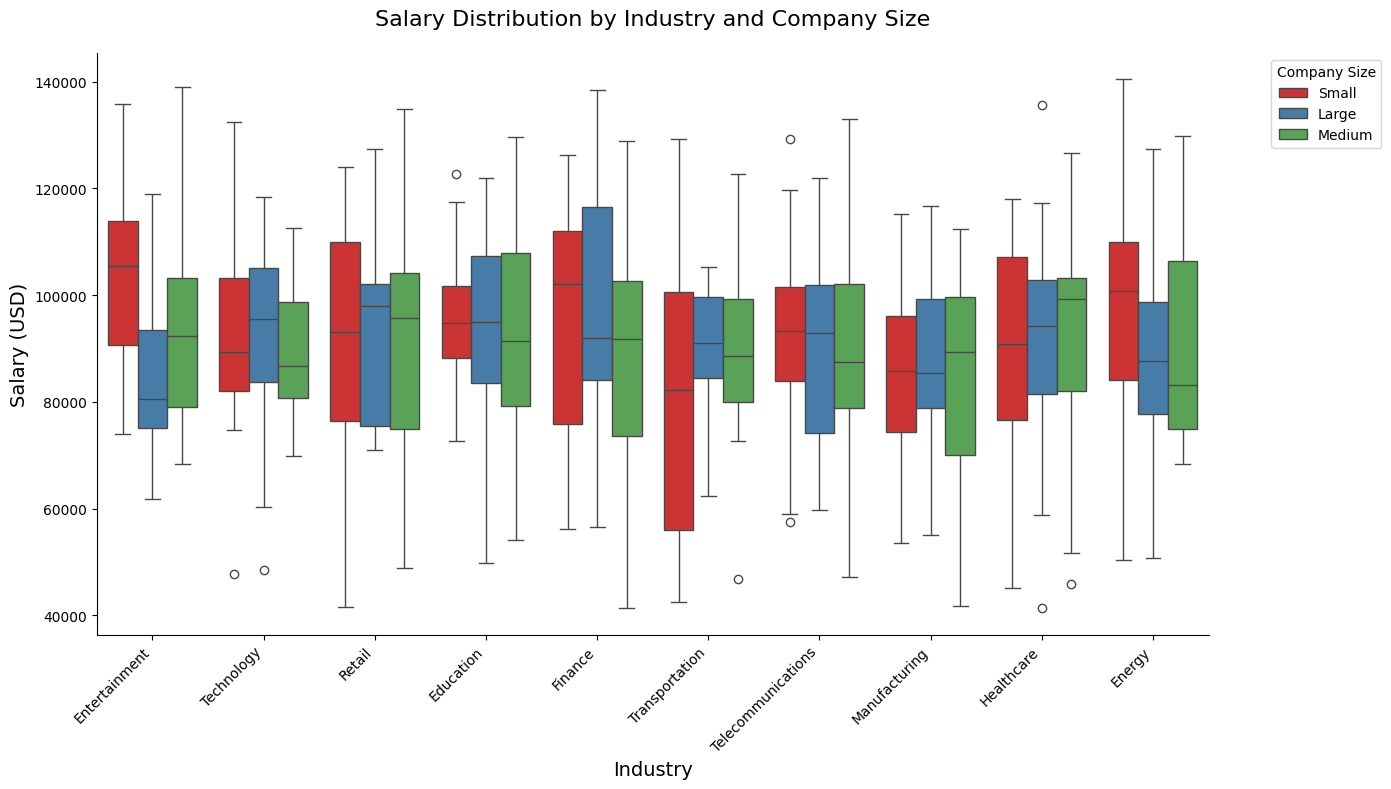

In [228]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Industry', y='Salary_USD', hue='Company_Size', palette='Set1')
plt.title('Salary Distribution by Industry and Company Size', fontsize=16, pad=20)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

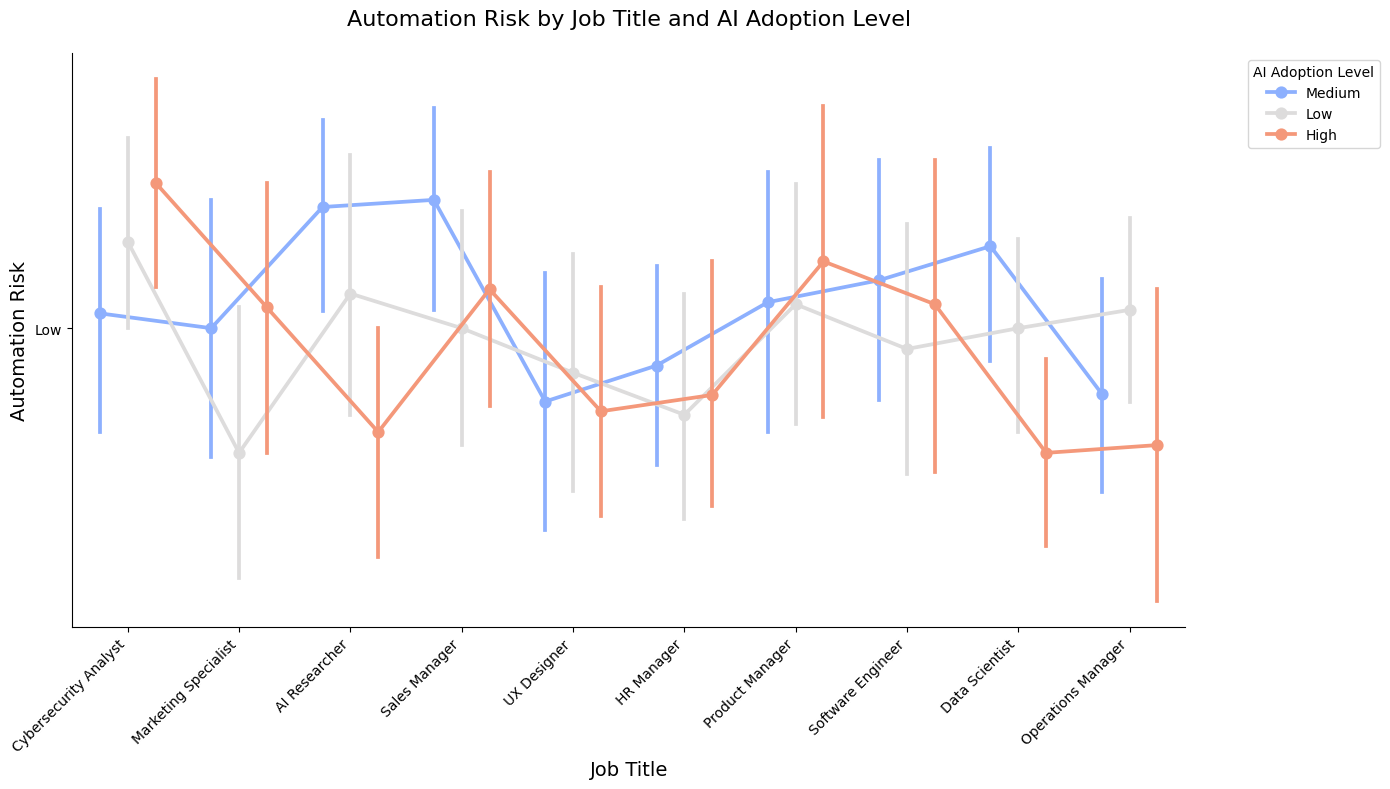

In [232]:
top_jobs = df['Job_Title'].value_counts().nlargest(10).index
filtered_df = df[df['Job_Title'].isin(top_jobs)]
plt.figure(figsize=(14, 8))
sns.pointplot(
    data=filtered_df,
    x='Job_Title',
    y='Automation_Risk',
    hue='AI_Adoption_Level',
    palette='coolwarm',
    dodge=0.5
)
plt.title('Automation Risk by Job Title and AI Adoption Level', fontsize=16, pad=20)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Automation Risk', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

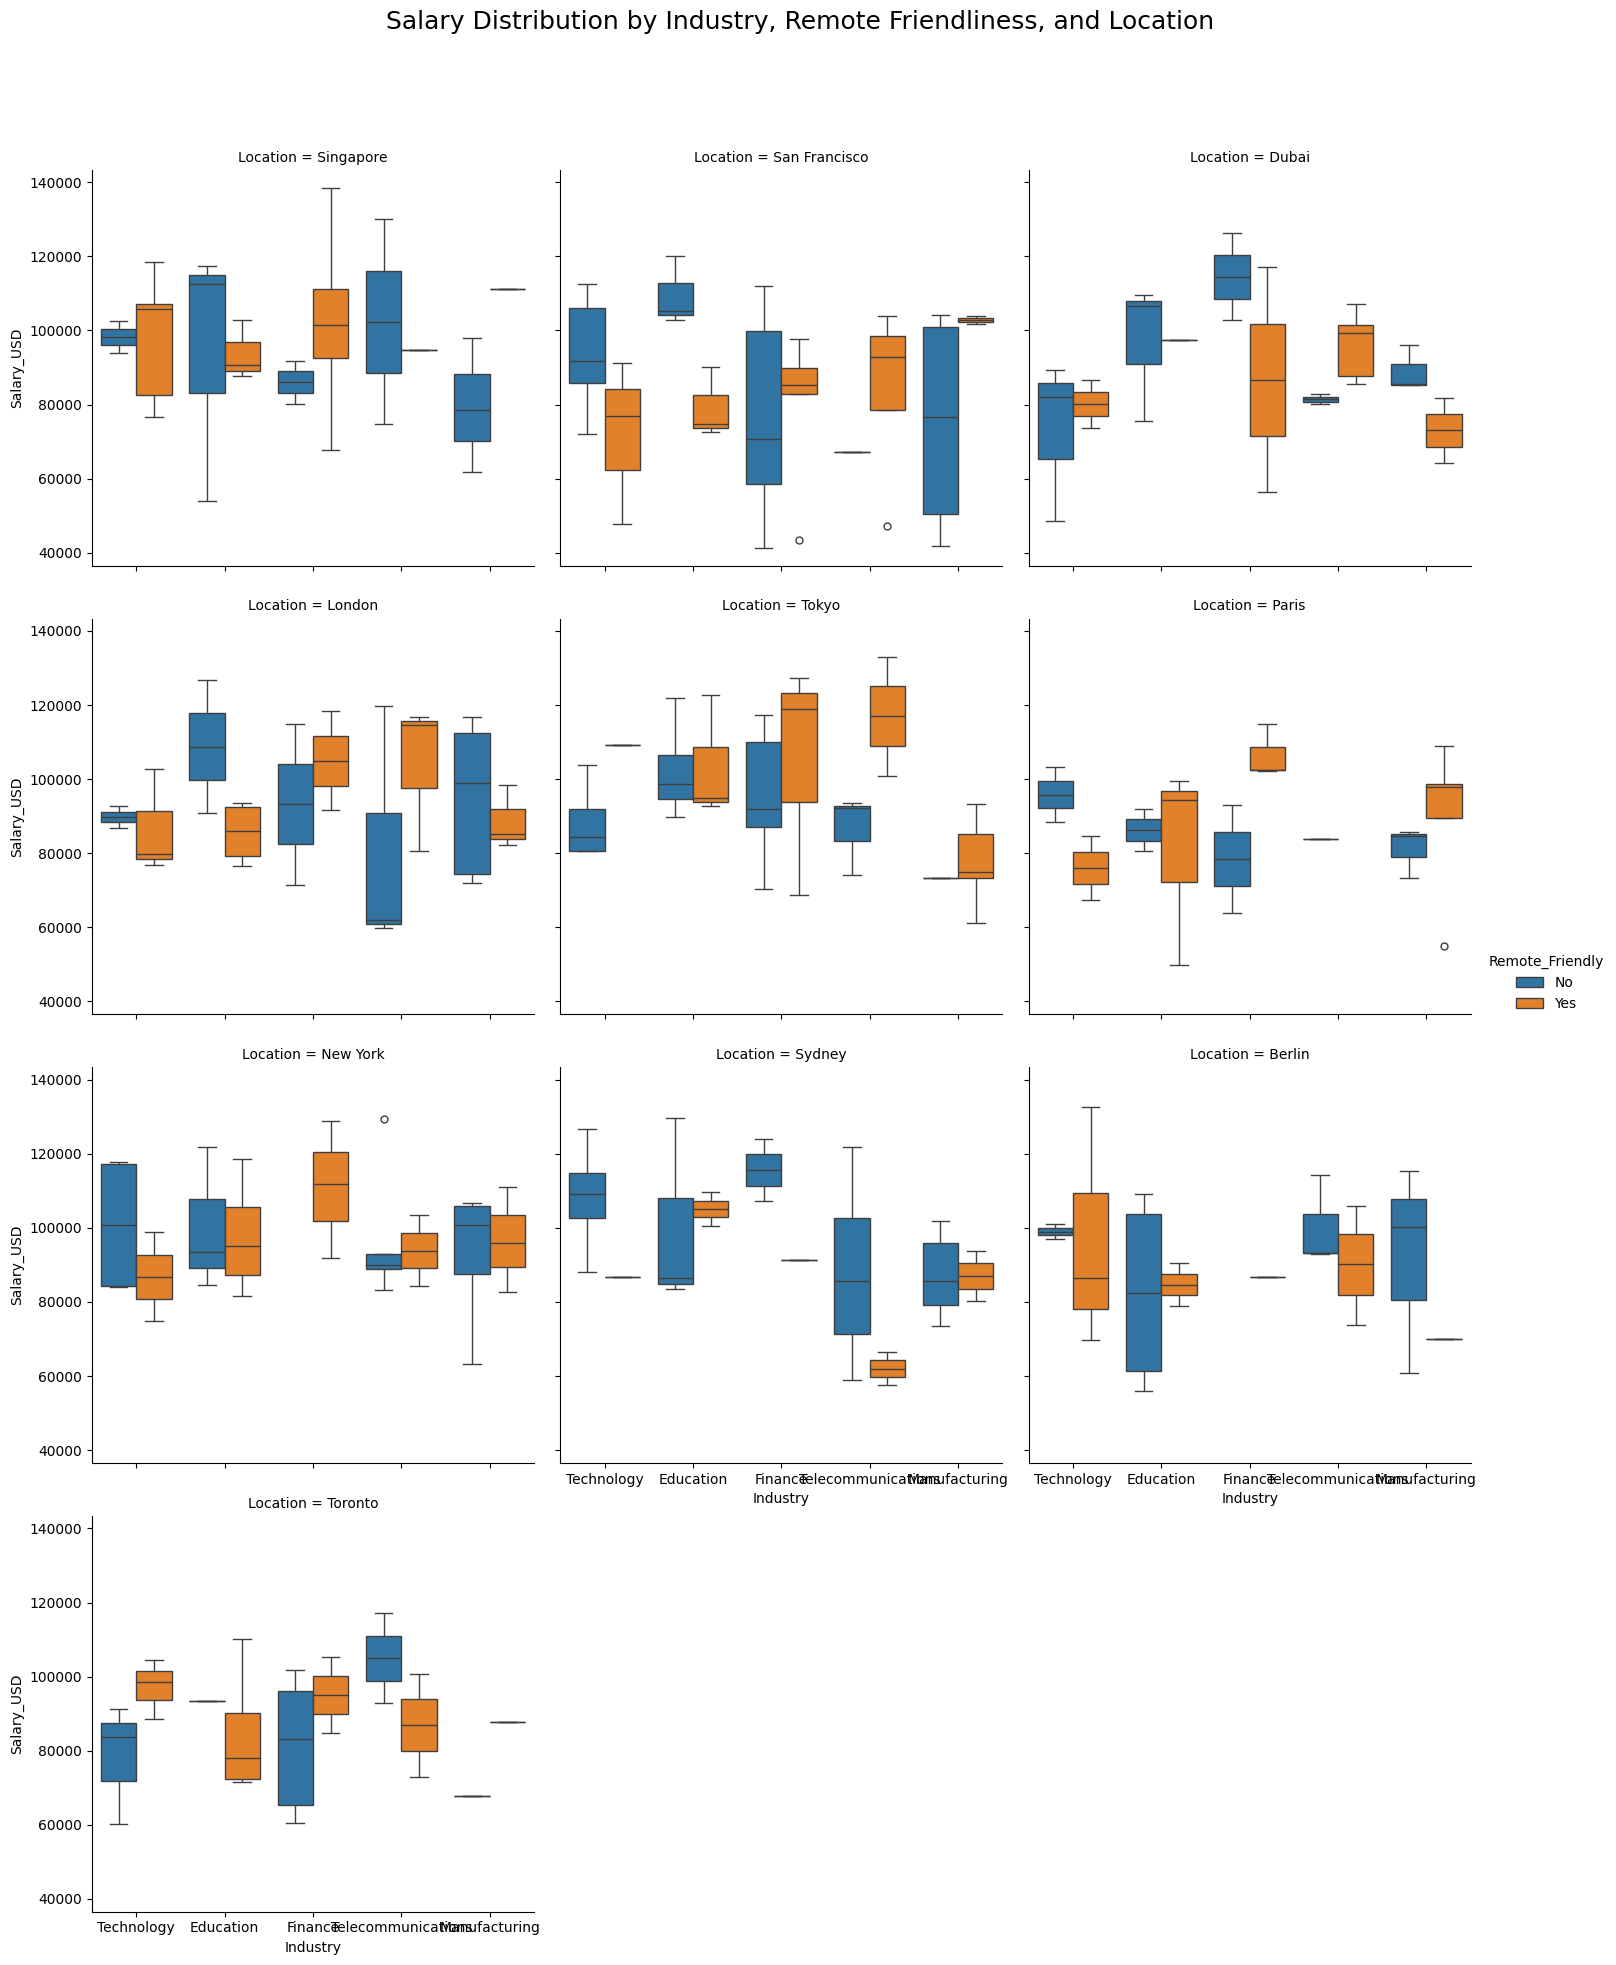

In [236]:
top_industries = df['Industry'].value_counts().nlargest(5).index
filtered_df = df[df['Industry'].isin(top_industries)]
plt.figure(figsize=(16, 10))
sns.catplot(
    data=filtered_df,
    x='Industry',
    y='Salary_USD',
    hue='Remote_Friendly',
    col='Location',
    kind='box',
    col_wrap=3,
    height=5,
    aspect=1
)
plt.subplots_adjust(top=0.9)
plt.suptitle('Salary Distribution by Industry, Remote Friendliness, and Location', fontsize=18)
plt.show()

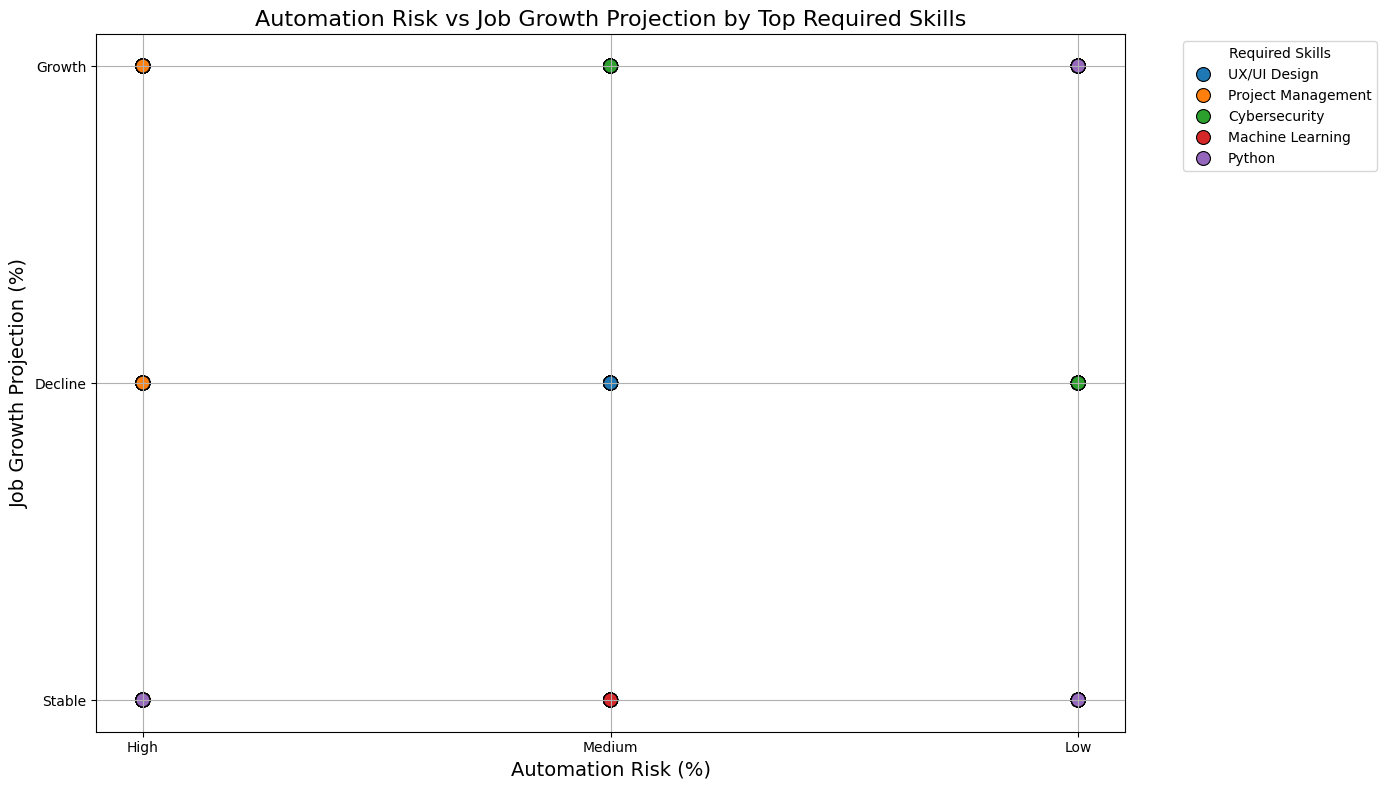

In [240]:
top_skills = df['Required_Skills'].value_counts().nlargest(5).index
filtered_df = df[df['Required_Skills'].isin(top_skills)]
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=filtered_df,
    x='Automation_Risk',
    y='Job_Growth_Projection',
    hue='Required_Skills',
    palette='tab10',
    s=100,
    edgecolor='black'
)
plt.title('Automation Risk vs Job Growth Projection by Top Required Skills', fontsize=16)
plt.xlabel('Automation Risk (%)', fontsize=14)
plt.ylabel('Job Growth Projection (%)', fontsize=14)
plt.legend(title='Required Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1032650120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\priya\AppData\Local\Temp\ipykernel_23808\1032650120.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


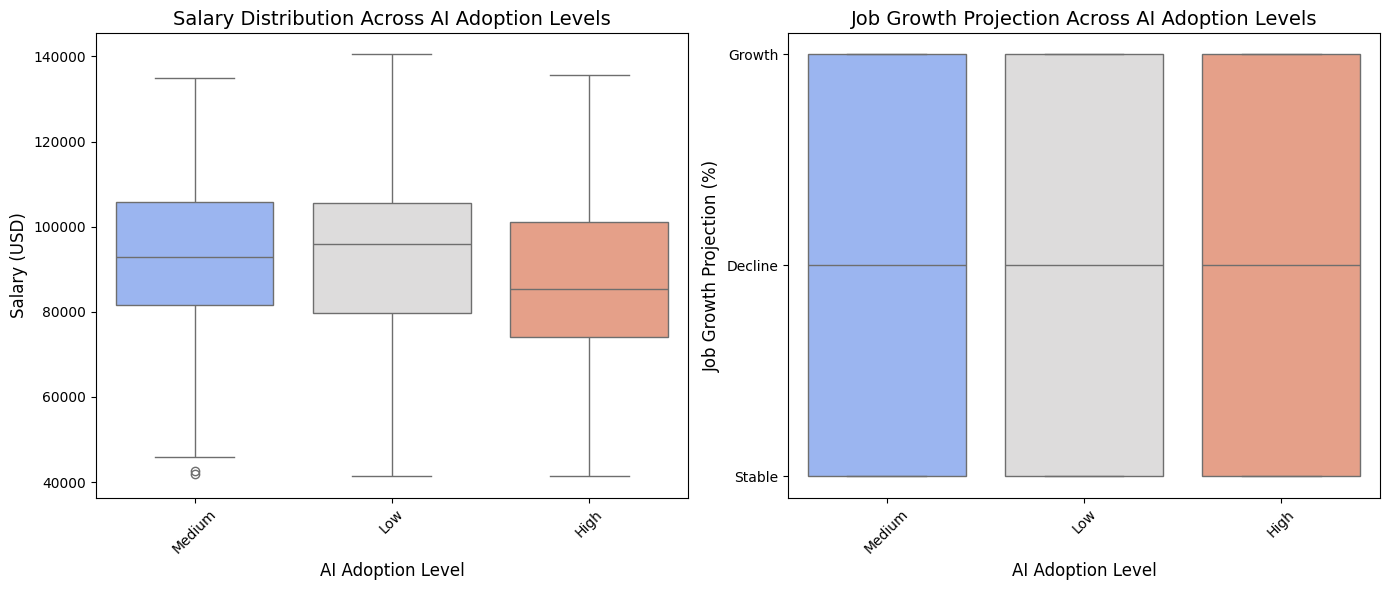

In [244]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df,
    x='AI_Adoption_Level',
    y='Salary_USD',
    palette='coolwarm'
)
plt.title('Salary Distribution Across AI Adoption Levels', fontsize=14)
plt.xlabel('AI Adoption Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x='AI_Adoption_Level',
    y='Job_Growth_Projection',
    palette='coolwarm'
)
plt.title('Job Growth Projection Across AI Adoption Levels', fontsize=14)
plt.xlabel('AI Adoption Level', fontsize=12)
plt.ylabel('Job Growth Projection (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **KeyInsights**

KeyInsights
Industry Trends:
Manufacturing leads with ~58 counts, followed closely by Education and Technology, highlighting strong sector representation.
Finance, Telecommunications, Energy, and Entertainment show moderate counts, while Transportation trails at ~39, the lowest.
The color gradient (yellow to blue) reflects count intensity, with a gradual decline and diverse sector coverage, indicating balanced representation without extreme dominance.

## **Skill Requirements:**

**Project Management** (12.1%) is the top in-demand skill, followed closely by Cybersecurity and Python (11.7% each).
Machine Learning (10.5%) highlights AI's rising importance, while UX/UI Design, Sales, and Data Analysis (9.7% each) reflect diverse needs.
Marketing (9.1%), JavaScript (8.9%), and Communication (6.9%) show a balanced mix of technical and soft skills, emphasizing multidisciplinary demand.

## **Location and Remote Work Patterns:**

In [ ]:
San Francisco leads with an equal split between remote and non-remote jobs, while Paris and London favor remote roles.
Sydney and Singapore lean toward non-remote jobs, whereas Toronto and Tokyo show near-balanced distributions.
Remote work is widely available across major cities, but adoption varies by region.

In [ ]:
Automation Risk and Future Growth:

In [ ]:
AI as a Complement, Not a Threat: High AI adoption correlates with lower automation risk for roles like AI Researcher, HR Manager, and Product Manager,
suggesting AI enhances rather than replaces these jobs.
Vulnerable vs. Resilient Roles: While Marketing Specialist and Sales Manager face higher automation risk due to repetitive tasks, technical roles (Software Engineer, Data Scientist, Cybersecurity Analyst) remain low-risk, as AI struggles to outpace evolving demands.
Context Matters: Uncertainty bands (e.g., for AI Researcher) show predictions vary—AI’s impact depends on task adaptability, proving it reshapes jobs more than it eliminates them outright.

In [ ]:
Recommendations

In [ ]:
Based on the analysis above, the following actions are recommended:

Focus learning efforts on AI specializations like Computer Vision, NLP, and AI Strategy to maximize career resilience and salary potential.
Employers should prioritize flexible remote-first work environments to attract a broader, high-caliber AI talent pool.
Workforce planners should establish structured upskilling programs to transition employees from high-risk roles to resilient AI positions.
Policymakers should support AI education initiatives and reskilling programs to prepare the workforce for emerging AI-driven industries.

In [ ]:
Assumptions and Caveats

In [ ]:
Several assumptions were made to address data limitations:

Missing salary values were excluded rather than imputed, as they represented less than 5% of the dataset.
Some job postings had incomplete skill listings; analyses on skill demand only included complete entries.
Automation risk estimates were based on third-party machine learning models, introducing potential bias.
Remote classification was standardized manually where ambiguous descriptions were provided.